# Data Preparation

In [5]:
import os
import json
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

In [13]:
json_file_path = "data/annotations.json"

with open(json_file_path, "r") as json_file:
    coco_data = json.load(json_file)

annotations = coco_data["annotations"]
images = coco_data["images"]
print(len(images))


1193


In [8]:
# Calculate the class distribution
class_counts = {}
for img in tqdm(images):
    class_id = img["file_name"].split('_')[-1].split('.')[0]
    class_counts[class_id] = class_counts.get(class_id, 0) + 1

# Filter out images with classes that have only one instance
images = [img for img in images if class_counts[img["file_name"].split('_')[-1].split('.')[0]] > 1]

# Get the set of filtered image IDs
image_ids = {img["id"] for img in images}

# Filter the annotations based on the filtered image IDs
annotations = [ann for ann in annotations if ann["image_id"] in image_ids]

#print(f"Selected classes: {selected_classes}")
print("Number of filtered images:", len(images))

  0%|          | 0/927 [00:00<?, ?it/s]

Number of filtered images: 927


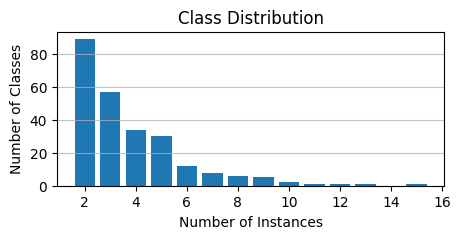

In [12]:
from collections import Counter


def plot_class_distribution(images):
    # Calculate the class distribution
    class_counts = {}
    for img in images:
        class_id = img["file_name"].split('_')[-1].split('.')[0]
        class_counts[class_id] = class_counts.get(class_id, 0) + 1

    
    instance_counts = Counter(class_counts.values())
    instances = sorted(instance_counts.keys())
    frequencies = [instance_counts[inst] for inst in instances]
    # Sort the classes by their counts
    #sorted_classes = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)

    # Separate class IDs and their counts
    #classes, counts = zip(*sorted_classes)

    # Create a bar chart for the class distribution
    plt.figure(figsize=(5, 2))
    plt.bar(instances, frequencies)
    plt.xlabel("Number of Instances")
    plt.ylabel("Number of Classes")
    plt.title("Class Distribution")
    plt.grid(axis='y', alpha=0.75)
    plt.show()


plot_class_distribution(images)

In [2]:
import os
import json
import random
import shutil

json_file_path = "data/annotations.json"

with open(json_file_path, "r") as json_file:
    coco_data = json.load(json_file)

annotations = coco_data["annotations"]
images = coco_data["images"]

# Calculate the class distribution
class_counts = {}
for img in images:
    class_id = img["file_name"].split('_')[-1].split('.')[0]
    class_counts[class_id] = class_counts.get(class_id, 0) + 1

# Filter out images with classes that have only one instance
images = [img for img in images if class_counts[img["file_name"].split('_')[-1].split('.')[0]] > 1]

# Get the set of filtered image IDs
image_ids = {img["id"] for img in images}

# Filter the annotations based on the filtered image IDs
annotations = [ann for ann in annotations if ann["image_id"] in image_ids]

# Separate class IDs
classes = list(class_counts.keys())

# Shuffle the classes
random.shuffle(classes)

# Split the classes into train (70%), validation (15%), and test (15%) sets
train_classes = set(classes[:int(0.7 * len(classes))])
val_classes = set(classes[int(0.7 * len(classes)):int(0.85 * len(classes))])
test_classes = set(classes[int(0.85 * len(classes)):])

# Define the train, validation, and test folders
train_folder = 'siamese_data/train'
val_folder = 'siamese_data/val'
test_folder = 'siamese_data/test'

# Remove the existing data folders if they exist
for folder in [train_folder, val_folder, test_folder]:
    if os.path.exists(folder):
        shutil.rmtree(folder)

# Create the train, validation, and test folders if they don't exist
os.makedirs(train_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

def copy_images_to_folder(images, classes, target_folder):
    for img in images:
        class_id = img["file_name"].split('_')[-1].split('.')[0]
        if class_id in classes:
            # Create a class-specific subfolder if it doesn't exist
            class_folder = os.path.join(target_folder, class_id)
            os.makedirs(class_folder, exist_ok=True)

            # Construct the file paths for both source and target
            source_file_path = os.path.join('data/images', img["file_name"])
            target_file_path = os.path.join(class_folder, img["file_name"])

            # Copy the image from the source to the target folder
            shutil.copy(source_file_path, target_file_path)

# Copy the images to the train, validation, and test folders
copy_images_to_folder(images, train_classes, train_folder)
copy_images_to_folder(images, val_classes, val_folder)
copy_images_to_folder(images, test_classes, test_folder)


927


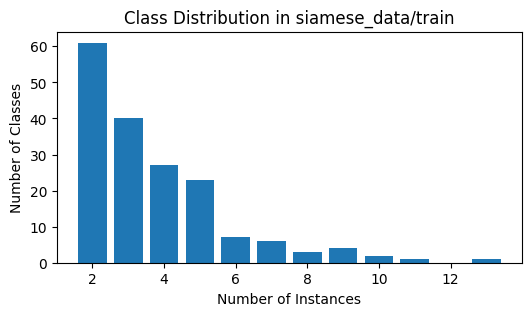

Total number of images in siamese_data/train: 653


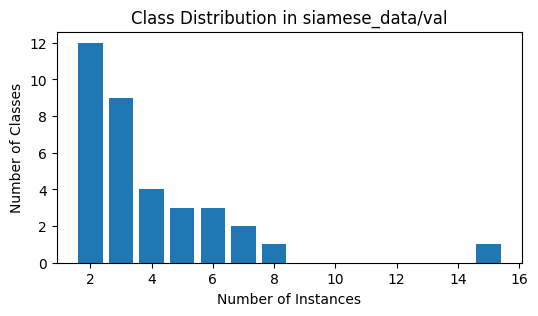

Total number of images in siamese_data/val: 137


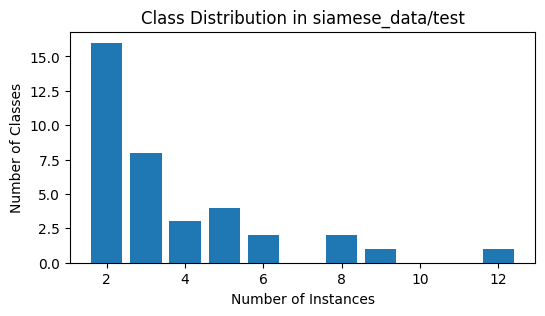

Total number of images in siamese_data/test: 137


In [4]:
import os
import json
import random
import shutil
import matplotlib.pyplot as plt

from collections import Counter

def plot_class_distribution(target_folder):
    # Get the list of class subfolders
    class_folders = [d for d in os.listdir(target_folder) if os.path.isdir(os.path.join(target_folder, d))]
    
    # Calculate the class distribution
    class_counts = {}
    total_images = 0
    for class_folder in class_folders:
        class_path = os.path.join(target_folder, class_folder)
        count = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
        class_counts[class_folder] = count
        total_images += count

    instance_counts = Counter(class_counts.values())
    instances = sorted(instance_counts.keys())
    frequencies = [instance_counts[inst] for inst in instances]

    # Create a bar chart for the class distribution
    plt.figure(figsize=(6, 3))
    plt.bar(instances, frequencies)
    plt.xlabel("Number of Instances")
    plt.ylabel("Number of Classes")
    plt.title(f"Class Distribution in {target_folder}")
    plt.show()
    
    print(f"Total number of images in {target_folder}: {total_images}")

# Plot the class distribution for the train and test folders
print(653 + 137 + 137)
plot_class_distribution(train_folder)
plot_class_distribution(val_folder)
plot_class_distribution(test_folder)

